In [2]:
#Data visualisation examples with Matplotlib and Seaborn
#dataset: BTC prices and TA Indicators during 2017
#Import libraries and data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
sns.set_style('whitegrid')
btcdat = pd.read_csv('C:\\Users\Ruthberg\\DevProjects\\notebooks\\data\\BTCUSD_1_20180101.csv',delimiter=',', encoding="utf-8")
btcdat.head()

,Idx,Symbol,Period,Time,Open,High,Low,Close,Volume,RSI,CCI,ADX,ATR
0,0,BTCUSD,1,2017.12.2121:20,15200.3,15210.8,15189.0,15201.8,74,50.2760,4.53483,18.3625,207.380
1,1,BTCUSD,1,2017.12.2121:19,15207.0,15210.5,15196.5,15200.3,103,50.1361,18.35580,19.1707,220.853
2,2,BTCUSD,1,2017.12.2121:18,15196.1,15207.2,15188.7,15207.0,56,46.5775,-23.49450,20.1031,230.843
3,3,BTCUSD,1,2017.12.2121:17,15186.1,15196.1,15174.1,15196.1,123,54.9738,89.20180,21.1791,214.698
4,4,BTCUSD,1,2017.12.2121:16,15186.1,15189.3,15174.5,15186.0,144,58.6701,132.17000,21.6945,221.861


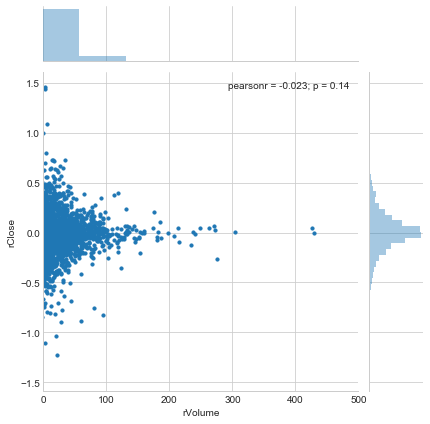

In [92]:
#Data transformations
#btcdat['dClose'] = btcdat['Close'].diff() #difference (if needed)
btcdat['rClose'] = btcdat['Close'].pct_change()*100
btcdat['rOpen'] = btcdat['Open'].pct_change()*100
btcdat['rHigh'] = btcdat['High'].pct_change()*100
btcdat['rLow'] = btcdat['Low'].pct_change()*100
btcdat['rVolume'] = btcdat['Volume'].pct_change()*100
btcdat.replace([np.inf, -np.inf], np.nan)
btcdat['rVolume'] = pd.to_numeric(btcdat['rVolume'], errors='coerce')
btcdat['rVolume'] = btcdat['rVolume'].astype(float)
btcdat.dropna()
btcdat = btcdat.iloc[1:]
#btcdat.dtypes
#plt.plot(btcdat['Close'])
btcdat.head()
sns.jointplot(x='rVolume',y='rClose',data=btcdat,joint_kws={"s": 10},xlim=(0, 500))
plt.show()

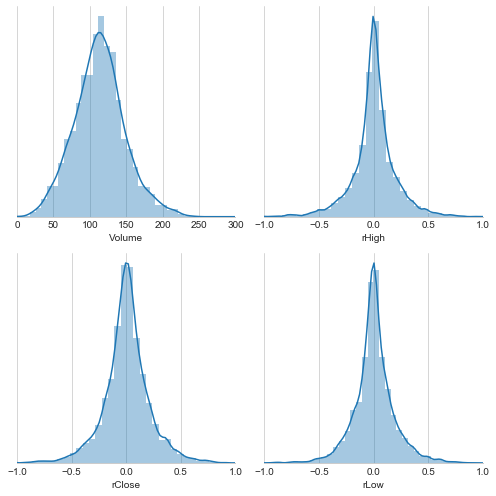

In [108]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
sns.despine(left=True)

splot = sns.distplot(btcdat['Volume'],ax=axes[0, 0])
splot.set_xlim(0, 300)
p2 = sns.distplot(btcdat['rHigh'],ax=axes[0, 1])
p2.set_xlim(-1, 1)
p3=sns.distplot(btcdat['rClose'],ax=axes[1, 0])
p3.set_xlim(-1, 1)
p4=sns.distplot(btcdat['rLow'],ax=axes[1, 1])
p4.set_xlim(-1, 1)
plt.setp(axes, yticks=[])
plt.tight_layout()

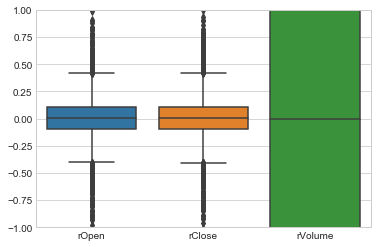

In [42]:
df2 = pd.concat([btcdat['rOpen'],btcdat['rClose'],btcdat['rVolume']],axis=1)
plt.ylim(-1, 1)
sns.boxplot(data=df2)
plt.show()

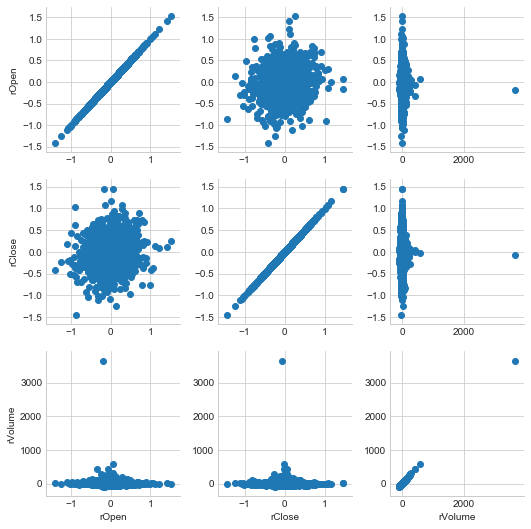

In [44]:
#sns.swarmplot(x='rHigh',y='rLow',data=btcdat)
#plt.show()
g = sns.PairGrid(df2)
g.map(plt.scatter)
plt.show()

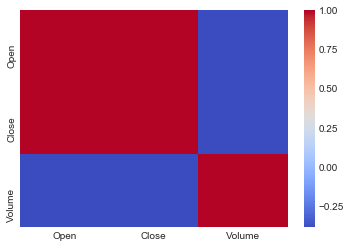

In [10]:
 #just example, bad "analysis"...
sns.heatmap(df2.corr(),cmap='coolwarm')
plt.show()

(-500, 500)

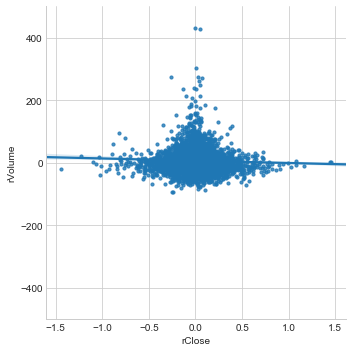

In [27]:
sns.lmplot(x='rClose',y='rVolume',data=btcdat,palette='coolwarm',scatter_kws={"s": 10})
plt.ylim(-500, 500)